## Dataset cachexia - Exploração de dados, pré-processamento e análise estatística univariada
Nesta secção vamos trabalhar com os dados do dataset Cachexia : 

*"Concentrations of 63 metabolites in 77 urine samples from cancer patients, measured by 1H NMR (Eisner et al, 2011). Metadata defines the two groups: control and cachexic patients."*

Importação e análise da dimensão dos dados

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
# para desenhar os gráficos dentro do notebook
%matplotlib inline

In [31]:
data = pd.read_csv('data_cachexia.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta_cachexia.csv',sep=',', index_col = 0)
print (data.shape)
print (meta.shape)
data.head()

(77, 63)
(77, 1)


,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
Patient ID,,,,,,,,,,,,,,,,,,,,,
PIF_178,40.85,65.37,18.73,26.05,71.52,1480.30,56.83,10.07,566.80,120.30,...,259.82,290.03,111.05,86.49,72.24,237.46,135.64,51.94,157.59,160.77
PIF_087,62.18,340.36,24.29,41.68,67.36,116.75,43.82,79.84,368.71,432.68,...,83.10,167.34,46.99,109.95,192.48,333.62,376.15,217.02,307.97,130.32
PIF_090,270.43,64.72,12.18,65.37,23.81,14.30,5.64,23.34,665.14,292.95,...,82.27,60.34,31.50,59.15,2164.62,330.30,86.49,58.56,145.47,83.93
NETL_005_V1,154.47,52.98,172.43,74.44,1199.91,555.57,175.91,25.03,411.58,214.86,...,235.10,323.76,30.57,102.51,125.21,1863.11,247.15,75.94,249.64,254.68
PIF_115,22.20,73.70,15.64,83.93,33.12,29.67,76.71,69.41,165.67,97.51,...,103.54,142.59,44.26,160.77,186.79,101.49,749.95,98.49,84.77,79.84


Sumário dos dados

In [54]:
print(data.columns)

Index(['1.6-Anhydro-beta-D-glucose', '1-Methylnicotinamide', '2-Aminobutyrate',
       '2-Hydroxyisobutyrate', '2-Oxoglutarate', '3-Aminoisobutyrate',
       '3-Hydroxybutyrate', '3-Hydroxyisovalerate', '3-Indoxylsulfate',
       '4-Hydroxyphenylacetate', 'Acetate', 'Acetone', 'Adipate', 'Alanine',
       'Asparagine', 'Betaine', 'Carnitine', 'Citrate', 'Creatine',
       'Creatinine', 'Dimethylamine', 'Ethanolamine', 'Formate', 'Fucose',
       'Fumarate', 'Glucose', 'Glutamine', 'Glycine', 'Glycolate',
       'Guanidoacetate', 'Hippurate', 'Histidine', 'Hypoxanthine',
       'Isoleucine', 'Lactate', 'Leucine', 'Lysine', 'Methylamine',
       'Methylguanidine', 'N.N-Dimethylglycine', 'O-Acetylcarnitine',
       'Pantothenate', 'Pyroglutamate', 'Pyruvate', 'Quinolinate', 'Serine',
       'Succinate', 'Sucrose', 'Tartrate', 'Taurine', 'Threonine',
       'Trigonelline', 'Trimethylamine N-oxide', 'Tryptophan', 'Tyrosine',
       'Uracil', 'Valine', 'Xylose', 'cis-Aconitate', 'myo-Inosito

Sumário dos metadados 

In [33]:
meta.describe()

,Muscle.loss
count,77
unique,2
top,cachexic
freq,47


**Ex. 1) Calcule a frequência de cada categoria nos metadados**

In [34]:
frequencia = meta.value_counts()
frequencia

Muscle.loss
cachexic       47
control        30
dtype: int64

**Ex.2) Verifique que não há valores em falta nos dados.**

In [35]:
data.isnull().sum()

1.6-Anhydro-beta-D-glucose    0
1-Methylnicotinamide          0
2-Aminobutyrate               0
2-Hydroxyisobutyrate          0
2-Oxoglutarate                0
                             ..
cis-Aconitate                 0
myo-Inositol                  0
trans-Aconitate               0
pi-Methylhistidine            0
tau-Methylhistidine           0
Length: 63, dtype: int64

Para cada coluna apresentar o intervalo de valores

In [36]:
data.apply(lambda x: str(x.min())+"---"+str( x.max()))

1.6-Anhydro-beta-D-glucose       4.71---685.4
1-Methylnicotinamide           6.42---1032.77
2-Aminobutyrate                 1.28---172.43
2-Hydroxyisobutyrate             4.85---93.69
2-Oxoglutarate                 5.53---2465.13
                                   ...       
cis-Aconitate                 12.94---1863.11
myo-Inositol                   11.59---854.06
trans-Aconitate                  4.9---217.02
pi-Methylhistidine            11.36---2697.28
tau-Methylhistidine              8.0---317.35
Length: 63, dtype: object

Criar um gráfico que permita visualizar os valores dos metabolitos "Alanine", "Citrate" e "Creatinine" para os pacientes de control. 

<Axes: xlabel='Patient ID'>

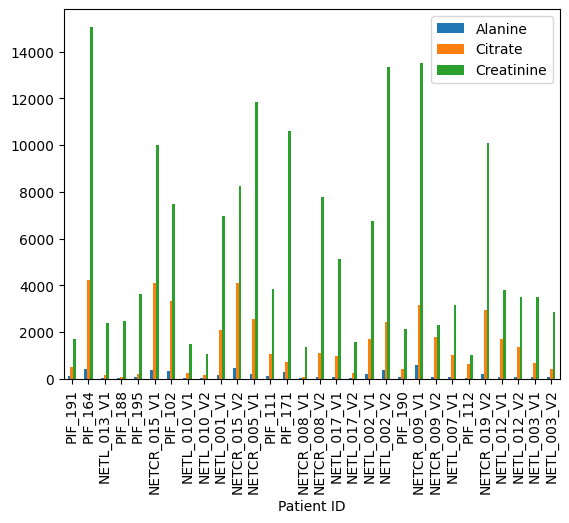

In [37]:
data_control = data[meta["Muscle.loss"]=="control"]
data_control.iloc[:,[13,17,19]].plot.bar()

**Ex.3) Exemplo de discretização de dados - altere os dados do metabolito Citrate de valor continuo para discretos: 
    "elevado", "baixo" consoante o valor seja: maior ou menor que a média.**

In [38]:
media = data['Citrate'].mean()
classify_citrate = lambda x: 'elevado' if x > media else 'baixo'
citrate_dicreto = data['Citrate'].apply(classify_citrate)
data.head()

,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
Patient ID,,,,,,,,,,,,,,,,,,,,,
PIF_178,40.85,65.37,18.73,26.05,71.52,1480.30,56.83,10.07,566.80,120.30,...,259.82,290.03,111.05,86.49,72.24,237.46,135.64,51.94,157.59,160.77
PIF_087,62.18,340.36,24.29,41.68,67.36,116.75,43.82,79.84,368.71,432.68,...,83.10,167.34,46.99,109.95,192.48,333.62,376.15,217.02,307.97,130.32
PIF_090,270.43,64.72,12.18,65.37,23.81,14.30,5.64,23.34,665.14,292.95,...,82.27,60.34,31.50,59.15,2164.62,330.30,86.49,58.56,145.47,83.93
NETL_005_V1,154.47,52.98,172.43,74.44,1199.91,555.57,175.91,25.03,411.58,214.86,...,235.10,323.76,30.57,102.51,125.21,1863.11,247.15,75.94,249.64,254.68
PIF_115,22.20,73.70,15.64,83.93,33.12,29.67,76.71,69.41,165.67,97.51,...,103.54,142.59,44.26,160.77,186.79,101.49,749.95,98.49,84.77,79.84


Standardização dos dados (usando scikit-learn)

<Axes: xlabel='Patient ID'>

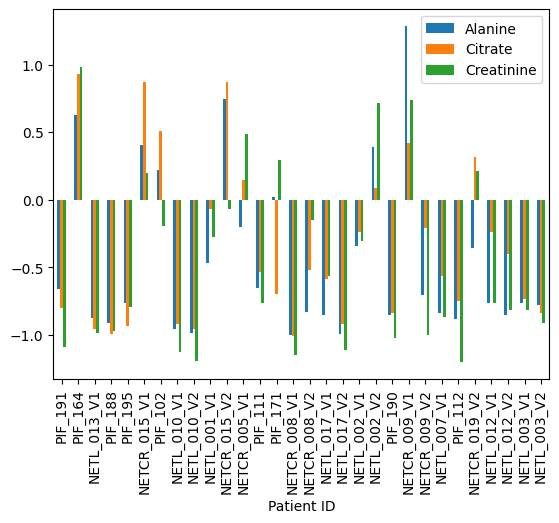

In [39]:
from sklearn import preprocessing
array_data = preprocessing.scale(data)#, with_mean = False)
data_scale =  pd.DataFrame(array_data, index =data.index , columns = data.columns)
data_control = data_scale[meta["Muscle.loss"]=="control"]
data_control.iloc[:,[13,17,19]].plot.bar()

**Ex. 4) Cria um boxplot para ver a distribuição dos valores dos metabolitos Asparagine, Acetate, Succinate.**

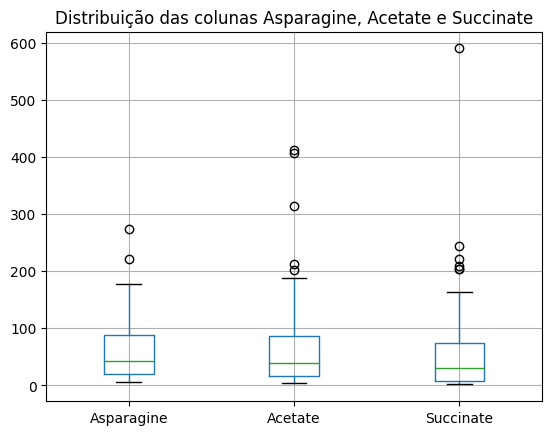

In [40]:
data.boxplot(column=['Asparagine', 'Acetate', 'Succinate'])
plt.title('Distribuição das colunas Asparagine, Acetate e Succinate')
plt.show()

Transformação logarítmica

In [44]:
log_data = np.log2(data)
log_data.apply(lambda x: str(x.min())+"---"+str( x.max()))

1.6-Anhydro-beta-D-glucose     2.2357270598380583---9.420802381631812
1-Methylnicotinamide           2.682573297347578---10.012303283487379
2-Aminobutyrate               0.35614381022527536---7.429866991382293
2-Hydroxyisobutyrate           2.277984747299765---6.5498231649670045
2-Oxoglutarate                 2.4672794804599825---11.26744801459588
                                               ...                   
cis-Aconitate                  3.693765712217783---10.863497139709002
myo-Inositol                    3.534808661231747---9.738193616367314
trans-Aconitate                 2.292781749227846---7.761684193602206
pi-Methylhistidine            3.5058909297299574---11.397289577701605
tau-Methylhistidine                           3.0---8.309931032395417
Length: 63, dtype: object

In [45]:
sel_log_data = log_data.iloc[:,indexes].values

plt.boxplot(sel_log_data)
plt.xticks([1,2,3],labels)
plt.title("Boxplot")
plt.show()

NameError: name 'indexes' is not defined

### Exemplos com testes estatísticos


**Ex. 5) Verifica se a distribuição do metabolito Alanine segue a distribuição normal quer de forma visual (QQplot), quer usando o teste de Shapiro.**

In [47]:
import statsmodels.api as sm
from scipy import stats

(array([31., 15., 13.,  9.,  5.,  0.,  1.,  1.,  1.,  1.]),
 array([  16.78 ,  146.393,  276.006,  405.619,  535.232,  664.845,
         794.458,  924.071, 1053.684, 1183.297, 1312.91 ]),
 <BarContainer object of 10 artists>)

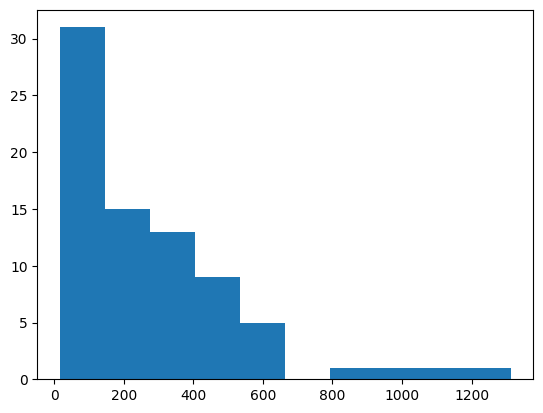

In [48]:
plt.close()
data_alanine = data.Alanine
plt.hist(data_alanine)

Shapiro-Wilk test statistic:  0.8279606699943542
Shapiro-Wilk p-value:  4.927390762077266e-08


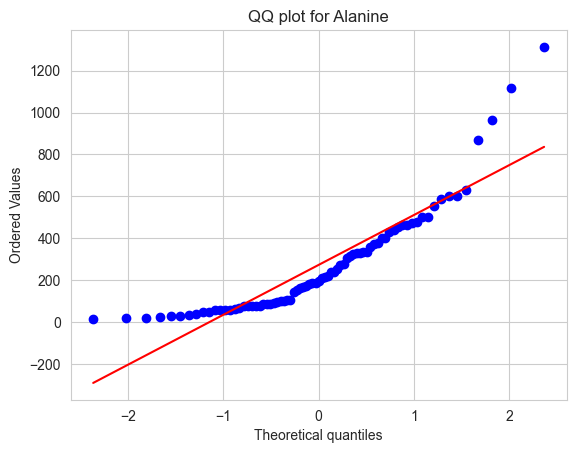

In [50]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

alanine_data = data['Alanine']
shapiro_test = stats.shapiro(alanine_data)
print("Shapiro-Wilk test statistic: ", shapiro_test.statistic)
print("Shapiro-Wilk p-value: ", shapiro_test.pvalue)

sns.set_style("whitegrid")
sns.set_palette("husl")
stats.probplot(alanine_data, dist='norm', plot=plt)
plt.title('QQ plot for Alanine')
plt.show()


Como o valor de p é menor que 0.05, podemos concluir que os dados não são normalmente distribuídos. Para alem disso vemos que os dados nao se alinham bem com a normal entao corrubora essa resposta

**Ex. 6) Verifica se a concentração de Alanina entre as duas categorias é semelhante, visualmente (usando histogramas) e usando testes estatísticos apropriados.**

In [55]:
data['Alanine'].describe()

count      77.000000
mean      273.562338
std       256.985016
min        16.780000
25%        78.260000
50%       194.420000
75%       399.410000
max      1312.910000
Name: Alanine, dtype: float64

(array([31., 15., 13.,  9.,  5.,  0.,  1.,  1.,  1.,  1.]),
 array([  16.78 ,  146.393,  276.006,  405.619,  535.232,  664.845,
         794.458,  924.071, 1053.684, 1183.297, 1312.91 ]),
 <BarContainer object of 10 artists>)

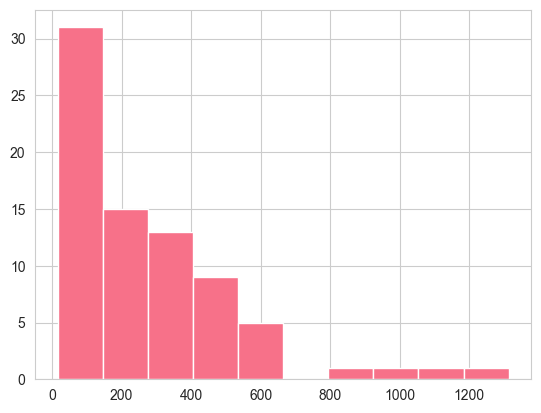

Quais os metabolitos que têm concentrações significativamente diferentes entre os dois grupos: control e cachexic. 

In [ ]:
type(data[meta['Muscle.loss']=='control'])

In [ ]:
metabs_de_tt = lambda x : stats.ttest_ind(x[meta['Muscle.loss']=='control'],x[meta['Muscle.loss']=='cachexic'])

data.columns[data.apply(lambda x: metabs_de_tt(x)[1]<0.05)]

**Ex.7) Repita o anterior usando Testes não paramétricos - Mann-Whitney U test**

Correções para testes múltiplos

In [ ]:
pvalues_tt = data.apply(lambda x: metabs_de_tt(x)[1])
pvalues_tt
type(pvalues_tt)

In [ ]:
import statsmodels.stats as sm
corr_pvalues = sm.multitest.multipletests(pvalues_tt, method = "fdr_bh")[1]
corr_pvalues

### Correlações

In [ ]:
data_glucose = data.Glucose
data_sucrose = data.Sucrose

plt.scatter(data_glucose, data_sucrose)
plt.show()

In [ ]:
corr, _ = stats.pearsonr(data_glucose, data_sucrose)
corr

In [ ]:
sp_corr, _ = stats.spearmanr(data_glucose, data_sucrose)
sp_corr

In [ ]:
corr_matrix = data.corr()
corr_matrix

In [ ]:
type(corr_matrix)

In [ ]:
corr_matrix_sp = data.corr(method = "spearman")
corr_matrix_sp

In [ ]:
import seaborn as sn
sn.heatmap(corr_matrix.iloc[1:10,1:10], annot=True)
plt.show()

In [ ]:
sn.heatmap(corr_matrix.iloc[1:20,1:20], annot=False)
plt.show()

Análise de variância / regressão linear

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

lm = ols("data.Leucine~data.Valine", data).fit()
anova_lm(lm)

In [ ]:
lm.summary()

In [ ]:
lm.rsquared

**Ex.8) Repita o anterior adicionando a Glucose como variável dependente**

In [ ]:
data["MuscleLoss"] = meta["Muscle.loss"]

In [ ]:
lm3 = ols("data.Leucine~data.MuscleLoss", data).fit()

In [ ]:
lm3.summary()